In [1]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
df = pd.read_csv ('train.csv') # Load the dataset into a pandas dataframe
df.info() # Display information about the dataframe, including data types and non-null counts
df.isnull().sum() # Check for missing values in each column of the dataframe

df.head(10) # Display the first 10 rows of the dataframe
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns # Select columns with numeric data types
print("colunas numericas: \n", colunas_numericas)

colunas_categoricas = df.select_dtypes(include=['object']).columns # Select columns with categorical data types
print("\ncolunas categoricas: \n", colunas_categoricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

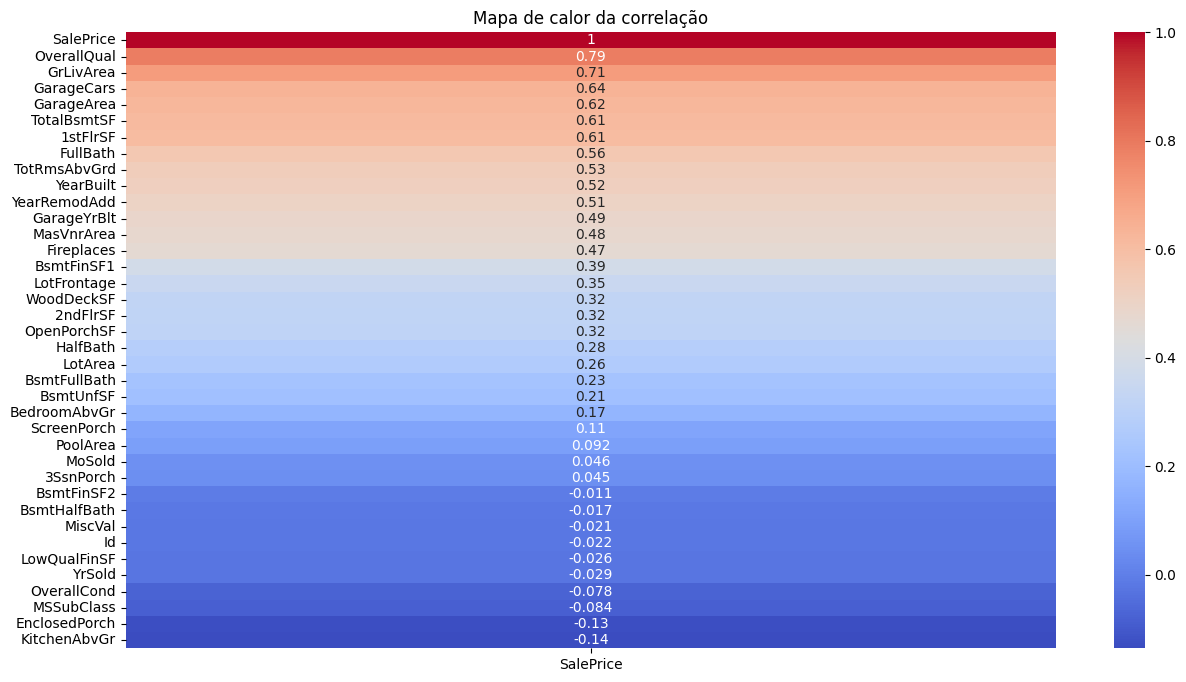

In [2]:
import seaborn as sns # Import the seaborn library for data visualization
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import pandas as pd 


df.dtypes [df.dtypes == 'object'] # Display the data types of columns that are of type 'object' (categorical)
df_numerico = df.select_dtypes(include=['int64', 'float64']) # Create a new dataframe with only numeric columns

correlacao = df_numerico.corr() # Calculate the correlation matrix for the numeric columns in the dataframe

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
sns.heatmap(correlacao [['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm') # Create a heatmap to visualize the correlation between 'SalePrice' and other numeric columns
plt.title('Mapa de calor da correlação') # Set the title of the heatmap
plt.show() # Display the heatmap


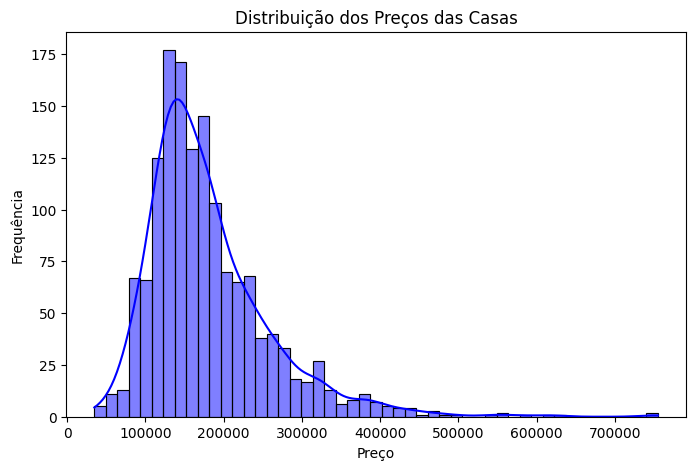

In [3]:
# Histograma para ver a distribuição dos preços
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title('Distribuição dos Preços das Casas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


In [4]:
valores_nnulos = df.isnull().sum().sort_values(ascending=False) # Check for missing values in the dataframe and sort them in descending order
valores_nnulos = valores_nnulos[valores_nnulos > 0] # Filter the dataframe to keep only columns with missing values
print(valores_nnulos) # Display the columns with missing values and their countsq

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [5]:
df['PoolQC'].fillna('No Pool', inplace=True) # Fill missing values in the 'poolQC' column with 'No Pool'
df['MiscFeature'].fillna('None', inplace=True) # Fill missing values in the 'MiscFeature' column with None
df['Alley'].fillna('No Alley', inplace=True) # Fill missing values in the 'Alley' column with 'No Alley'
df['Fence'].fillna('No Fence', inplace=True) # Fill missing values in the 'Fence' column with 'No Fence'
df['MasVnrType'].fillna('none', inplace=True) # Fill missing values in the 'MasVnrType' column with 'none'
df['FireplaceQu'].fillna('No Fireplace', inplace=True) # Fill missing values in the 'FireplaceQu' column with 'No Fireplace'

df['GarageQual'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageQual' column with 'No Garage'
df['GarageFinish'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageFinish' column with 'No Garage'
df['GarageType'].fillna('No garage',inplace=True) # Fill missing values in the 'GarageType' column with 'No garage'
df['GarageCond'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageCond' column with 'No Garage'


df['BsmtFinType2'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtFinType2' column with 'No Basement'
df['BsmtExposure'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtExposure' column with 'No Basement'
df['BsmtCond'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtCond' column with 'No Basement'    
df['BsmtQual'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtQual' column with 'No Basement'
df['BsmtFinType1'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtFinType1' column with 'No Basement'


C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_6580\1313285629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PoolQC'].fillna('No Pool', inplace=True) # Fill missing values in the 'poolQC' column with 'No Pool'
C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_6580\1313285629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [6]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) # Fill missing values in the 'LotFrontage' column with the mean of that column
df['MasVnrArea'].fillna(0, inplace=True) # Fill missing values in the 'MasVnrArea' column with 0
df['GarageYrBlt'].fillna(0, inplace=True) # Fill missing values in the 'GarageYrBlt' column with 0
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True) # Fill missing values in the 'Electrical' column with the mode of that column

C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_6580\3488803488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) # Fill missing values in the 'LotFrontage' column with the mean of that column
C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_6580\3488803488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wor

In [7]:
print(df.isnull().sum().sum())

0


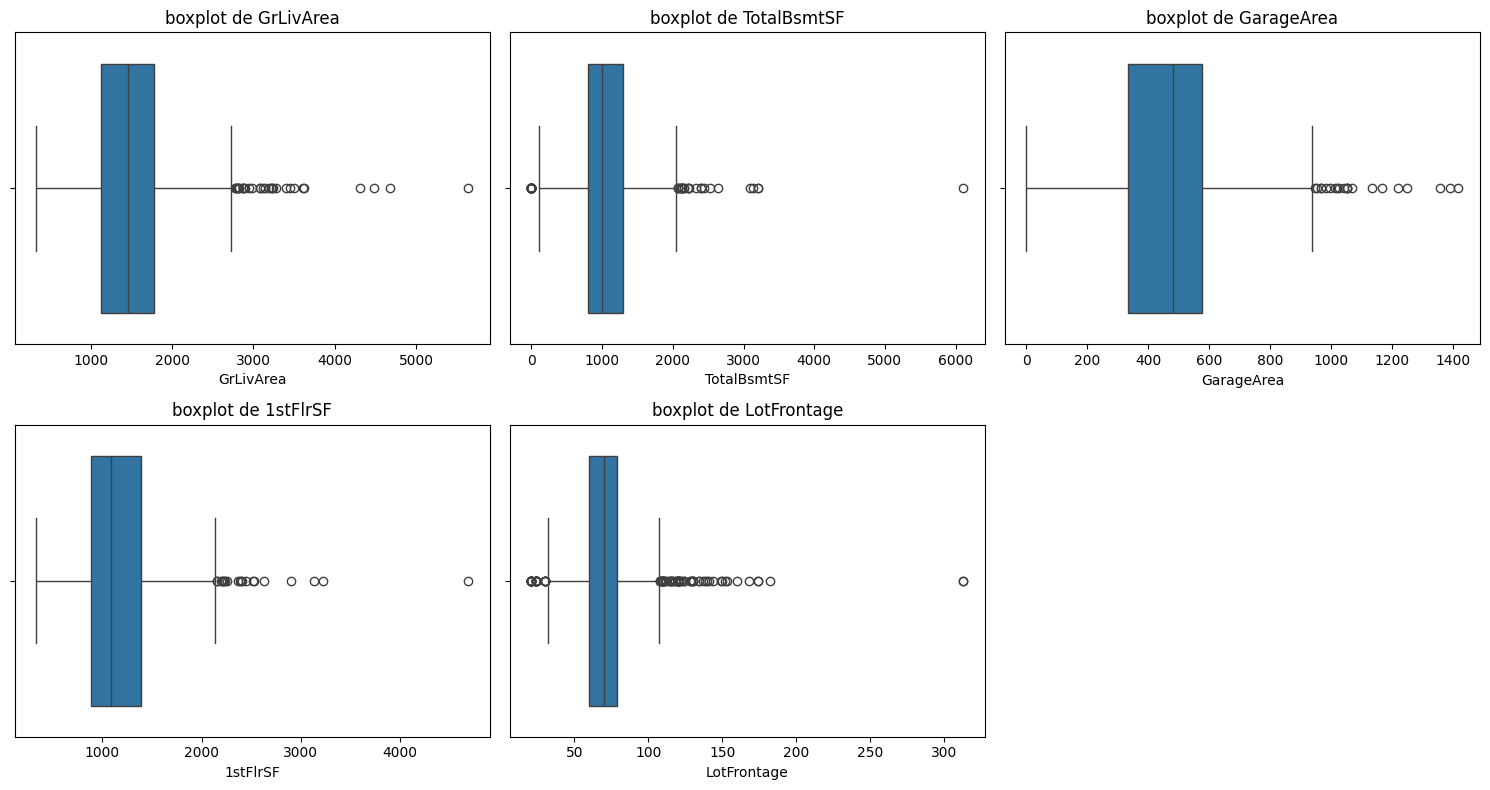

In [8]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import seaborn as sns # Import the seaborn library for data visualization

variaveis_importantes  = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotFrontage']  # List of important variables to analyze

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
for i, coluna in enumerate(variaveis_importantes ,1): # Loop through the important variables and their indices
    plt.subplot (2, 3, i) # Create a subplot for each variable
    sns.boxplot(x=df[coluna])
    plt.title(f'boxplot de {coluna}')   # Set the title of the boxplot
plt.tight_layout() # Adjust the layout of the subplots
plt.show() # Display the boxplots


Outliers: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,No Alley,IR1,Bnk,AllPub,...,0,No Pool,No Fence,None,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,No Alley,IR3,Bnk,AllPub,...,480,Gd,No Fence,None,0,1,2008,New,Partial,160000


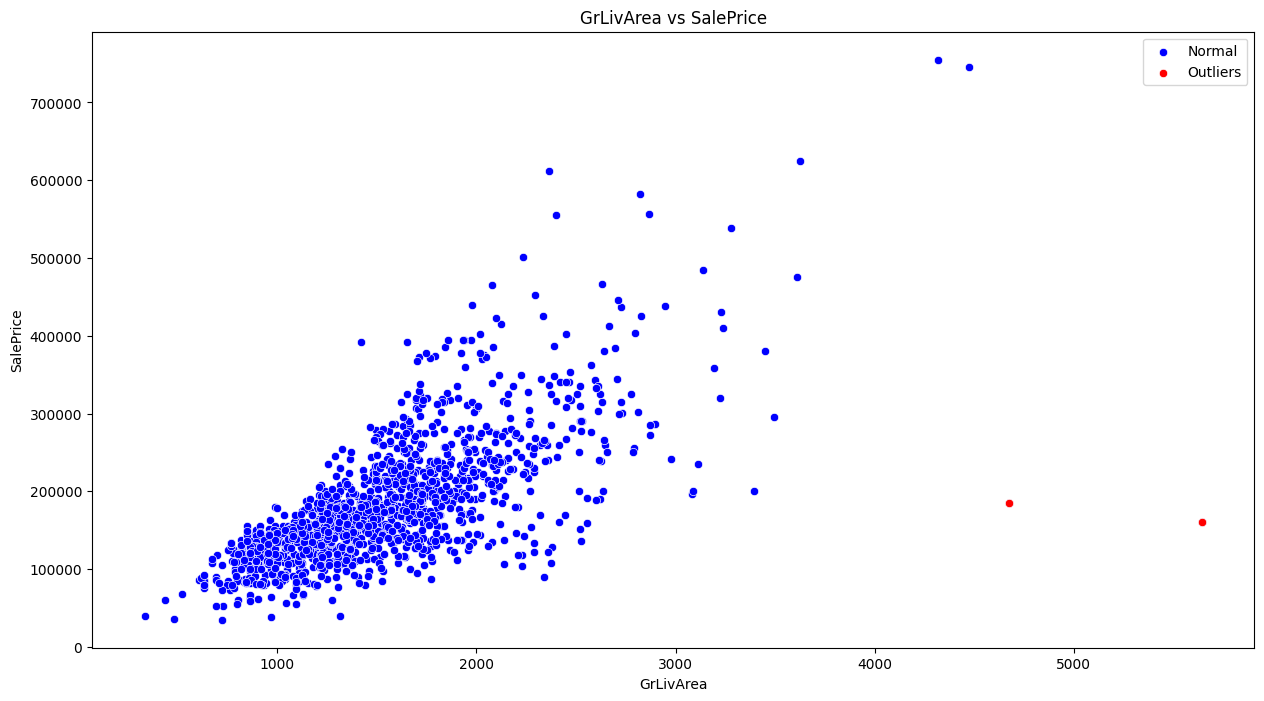

In [9]:
outliers= df [(df ['GrLivArea'] > 4000) & (df ['SalePrice'] < 300000)] # Identify outliers based on the 'GrLivArea' and 'SalePrice' columns
print ("Outliers: \n") # Display the identified outliers
display(outliers) # Display the outliers in a more readable format

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
sns.scatterplot(data=df, x = 'GrLivArea', y='SalePrice', color = 'blue', label = 'Normal') # Plot the normal data points
sns.scatterplot(data=outliers, x = 'GrLivArea', y='SalePrice', color = 'red', label = 'Outliers') # Plot the outliers in a different color
plt.title('GrLivArea vs SalePrice') # Set the title of the scatter plot
plt.show() # Display the scatter plot
 


**Aqui eu quis ver os outliers em todas as colunas influentes para ver o quanto outliers estao sendo relevantes**

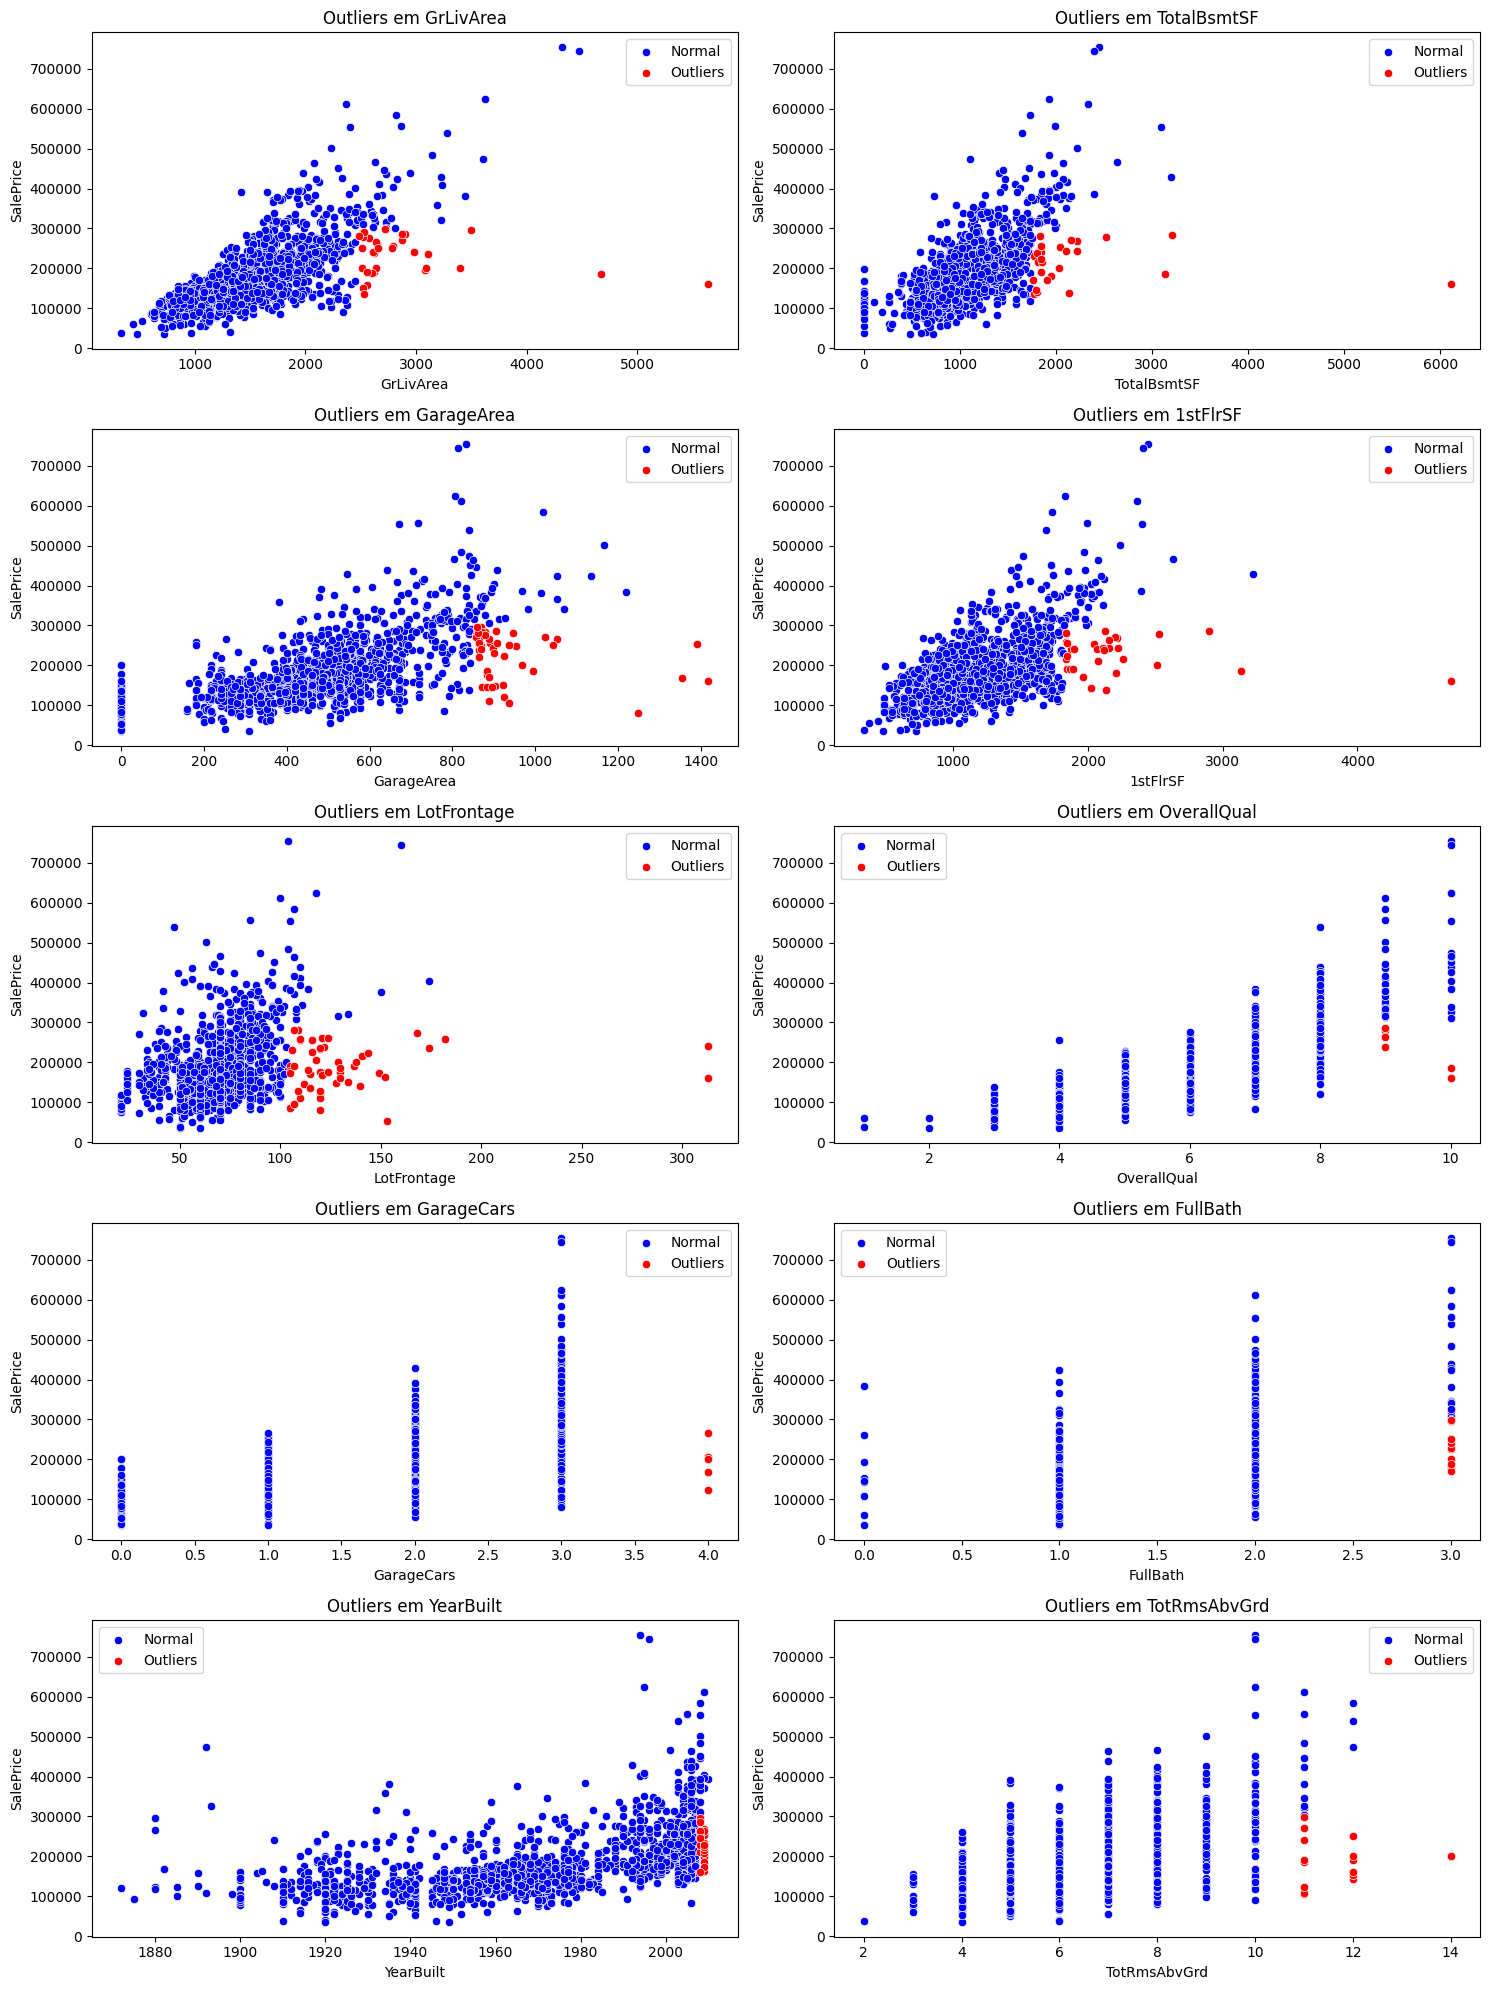

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,No Alley,IR1,Bnk,AllPub,...,0,No Pool,No Fence,None,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,No Alley,IR3,Bnk,AllPub,...,480,Gd,No Fence,None,0,1,2008,New,Partial,160000


In [10]:
import seaborn as sns  # Import the seaborn library for data visualization
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Lista das colunas que queremos analisar
colunas1 = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotFrontage', 
            'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd']

# Definindo o tamanho da figura e a quantidade de linhas e colunas
plt.figure(figsize=(15, 20)) 

# Loop para criar os subplots
for i, coluna in enumerate(colunas1, 1):
    plt.subplot(5, 2, i)  # Organiza em 5 linhas e 2 colunas
    
    # Gráfico de dispersão dos dados normais
    sns.scatterplot(data=df, x=coluna, y='SalePrice', color='blue', label='Normal')
    
    # Identificação dos outliers com base no 95º percentil
    outliers_coluna = df[(df[coluna] > df[coluna].quantile(0.95)) & (df['SalePrice'] < 300000)]
    
    # Gráfico de dispersão dos outliers
    sns.scatterplot(data=outliers_coluna, x=coluna, y='SalePrice', color='red', label='Outliers')
    
    # Título para cada gráfico
    plt.title(f'Outliers em {coluna}')

# Ajusta o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()
display(outliers) # Display the outliers in a more readable format



**Agora quero testar diferentes percentis para ver a diferenca de um para o outro para sabermos com qual vamos trabalhar**


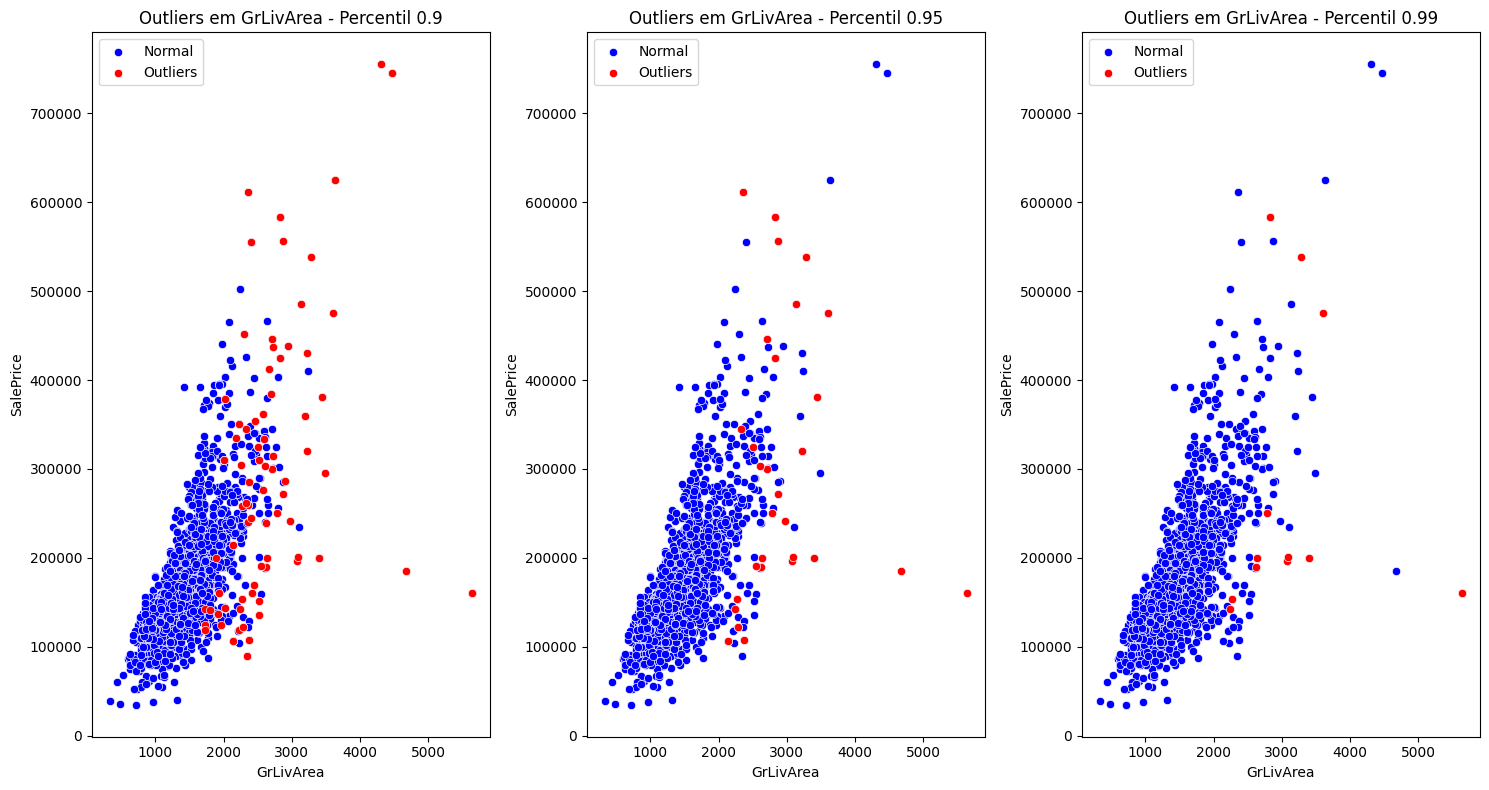

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.000000,22950,Pave,No Alley,IR2,Lvl,AllPub,...,0,No Pool,GdPrv,None,0,6,2006,WD,Normal,475000
635,636,190,RH,60.000000,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,No Pool,No Fence,None,0,3,2007,WD,Abnorml,200000
769,770,60,RL,47.000000,53504,Pave,No Alley,IR2,HLS,AllPub,...,0,No Pool,No Fence,None,0,6,2010,WD,Normal,538000
803,804,60,RL,107.000000,13891,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,1,2009,New,Partial,582933
897,898,90,RL,64.000000,7018,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,6,2009,WD,Alloca,142953
910,911,90,RL,80.000000,11600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,1,2010,WD,Normal,154300
1031,1032,75,RL,102.000000,15863,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2009,WD,Normal,197000
1173,1174,50,RL,138.000000,18030,Pave,No Alley,IR1,Bnk,AllPub,...,0,No Pool,MnPrv,None,0,3,2007,WD,Normal,200500
1230,1231,90,RL,70.049958,18890,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,Gar2,8300,8,2007,WD,Normal,190000
1298,1299,60,RL,313.000000,63887,Pave,No Alley,IR3,Bnk,AllPub,...,480,Gd,No Fence,None,0,1,2008,New,Partial,160000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

percentis = [0.90, 0.95, 0.99] # Define the percentiles to be used for outlier detection
coluna2 = 'GrLivArea' # Define the column to be analyzed for outliers

plt.figure(figsize=(15, 8)) # Set the figure size for the plot

for i, perc in enumerate(percentis, 1): # Loop through the percentiles and their indices
    plt.subplot(1, len(percentis), i) # Create a subplot for each percentile
    outliers = df[df[coluna] > df[coluna].quantile(perc)] # Identify outliers based on the specified percentile
    sns.scatterplot(data=df, x=coluna2, y='SalePrice', color='blue', label='Normal') # Plot the normal data points
    sns.scatterplot(data=outliers, x=coluna2, y='SalePrice', color='red', label='Outliers') # Plot the outliers in a different color
    plt.title(f'Outliers em {coluna2} - Percentil {perc}') # Set the title of the scatter plot
plt.tight_layout() # Adjust the layout of the subplots
plt.show() # Display the scatter plot

display(outliers) # Display the outliers in a more readable format


**Pude observar que 0.95 e um otimo meio termo para continuar para a remocao dos mesmos outliers**

In [12]:
colunas_categoricas = df.select_dtypes(include=['object']).columns # Select columns with categorical data types
print("\ncolunas categoricas: \n", colunas_categoricas) # Display the categorical columns
# Loop through each categorical column


colunas categoricas: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [13]:
valores_nulos_categoricos = df[colunas_categoricas].isnull().sum() # Check for missing values in the categorical columns
print(valores_nulos_categoricos) # Display the missing values in the categorical columns

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [14]:
for coluna in colunas_categoricas:
    print(f"\nDistribuição de {coluna}:") # Print the distribution of each categorical column
    display(pd.DataFrame(df[coluna].value_counts()).reset_index().rename(columns={'index': coluna, coluna: 'Contagem'})) # Display the value counts of each categorical column in a readable format
display(df.head(25))


Distribuição de MSZoning:


,Contagem,count
0,RL,1151
1,RM,218
2,FV,65
3,RH,16
4,C (all),10



Distribuição de Street:


,Contagem,count
0,Pave,1454
1,Grvl,6



Distribuição de Alley:


,Contagem,count
0,No Alley,1369
1,Grvl,50
2,Pave,41



Distribuição de LotShape:


,Contagem,count
0,Reg,925
1,IR1,484
2,IR2,41
3,IR3,10



Distribuição de LandContour:


,Contagem,count
0,Lvl,1311
1,Bnk,63
2,HLS,50
3,Low,36



Distribuição de Utilities:


,Contagem,count
0,AllPub,1459
1,NoSeWa,1



Distribuição de LotConfig:


,Contagem,count
0,Inside,1052
1,Corner,263
2,CulDSac,94
3,FR2,47
4,FR3,4



Distribuição de LandSlope:


,Contagem,count
0,Gtl,1382
1,Mod,65
2,Sev,13



Distribuição de Neighborhood:


,Contagem,count
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,100
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59



Distribuição de Condition1:


,Contagem,count
0,Norm,1260
1,Feedr,81
2,Artery,48
3,RRAn,26
4,PosN,19
5,RRAe,11
6,PosA,8
7,RRNn,5
8,RRNe,2



Distribuição de Condition2:


,Contagem,count
0,Norm,1445
1,Feedr,6
2,Artery,2
3,RRNn,2
4,PosN,2
5,PosA,1
6,RRAn,1
7,RRAe,1



Distribuição de BldgType:


,Contagem,count
0,1Fam,1220
1,TwnhsE,114
2,Duplex,52
3,Twnhs,43
4,2fmCon,31



Distribuição de HouseStyle:


,Contagem,count
0,1Story,726
1,2Story,445
2,1.5Fin,154
3,SLvl,65
4,SFoyer,37
5,1.5Unf,14
6,2.5Unf,11
7,2.5Fin,8



Distribuição de RoofStyle:


,Contagem,count
0,Gable,1141
1,Hip,286
2,Flat,13
3,Gambrel,11
4,Mansard,7
5,Shed,2



Distribuição de RoofMatl:


,Contagem,count
0,CompShg,1434
1,Tar&Grv,11
2,WdShngl,6
3,WdShake,5
4,Metal,1
5,Membran,1
6,Roll,1
7,ClyTile,1



Distribuição de Exterior1st:


,Contagem,count
0,VinylSd,515
1,HdBoard,222
2,MetalSd,220
3,Wd Sdng,206
4,Plywood,108
5,CemntBd,61
6,BrkFace,50
7,WdShing,26
8,Stucco,25
9,AsbShng,20



Distribuição de Exterior2nd:


,Contagem,count
0,VinylSd,504
1,MetalSd,214
2,HdBoard,207
3,Wd Sdng,197
4,Plywood,142
5,CmentBd,60
6,Wd Shng,38
7,Stucco,26
8,BrkFace,25
9,AsbShng,20



Distribuição de MasVnrType:


,Contagem,count
0,none,872
1,BrkFace,445
2,Stone,128
3,BrkCmn,15



Distribuição de ExterQual:


,Contagem,count
0,TA,906
1,Gd,488
2,Ex,52
3,Fa,14



Distribuição de ExterCond:


,Contagem,count
0,TA,1282
1,Gd,146
2,Fa,28
3,Ex,3
4,Po,1



Distribuição de Foundation:


,Contagem,count
0,PConc,647
1,CBlock,634
2,BrkTil,146
3,Slab,24
4,Stone,6
5,Wood,3



Distribuição de BsmtQual:


,Contagem,count
0,TA,649
1,Gd,618
2,Ex,121
3,No Basement,37
4,Fa,35



Distribuição de BsmtCond:


,Contagem,count
0,TA,1311
1,Gd,65
2,Fa,45
3,No Basement,37
4,Po,2



Distribuição de BsmtExposure:


,Contagem,count
0,No,953
1,Av,221
2,Gd,134
3,Mn,114
4,No Basement,38



Distribuição de BsmtFinType1:


,Contagem,count
0,Unf,430
1,GLQ,418
2,ALQ,220
3,BLQ,148
4,Rec,133
5,LwQ,74
6,No Basement,37



Distribuição de BsmtFinType2:


,Contagem,count
0,Unf,1256
1,Rec,54
2,LwQ,46
3,No Basement,38
4,BLQ,33
5,ALQ,19
6,GLQ,14



Distribuição de Heating:


,Contagem,count
0,GasA,1428
1,GasW,18
2,Grav,7
3,Wall,4
4,OthW,2
5,Floor,1



Distribuição de HeatingQC:


,Contagem,count
0,Ex,741
1,TA,428
2,Gd,241
3,Fa,49
4,Po,1



Distribuição de CentralAir:


,Contagem,count
0,Y,1365
1,N,95



Distribuição de Electrical:


,Contagem,count
0,SBrkr,1335
1,FuseA,94
2,FuseF,27
3,FuseP,3
4,Mix,1



Distribuição de KitchenQual:


,Contagem,count
0,TA,735
1,Gd,586
2,Ex,100
3,Fa,39



Distribuição de Functional:


,Contagem,count
0,Typ,1360
1,Min2,34
2,Min1,31
3,Mod,15
4,Maj1,14
5,Maj2,5
6,Sev,1



Distribuição de FireplaceQu:


,Contagem,count
0,No Fireplace,690
1,Gd,380
2,TA,313
3,Fa,33
4,Ex,24
5,Po,20



Distribuição de GarageType:


,Contagem,count
0,Attchd,870
1,Detchd,387
2,BuiltIn,88
3,No garage,81
4,Basment,19
5,CarPort,9
6,2Types,6



Distribuição de GarageFinish:


,Contagem,count
0,Unf,605
1,RFn,422
2,Fin,352
3,No Garage,81



Distribuição de GarageQual:


,Contagem,count
0,TA,1311
1,No Garage,81
2,Fa,48
3,Gd,14
4,Ex,3
5,Po,3



Distribuição de GarageCond:


,Contagem,count
0,TA,1326
1,No Garage,81
2,Fa,35
3,Gd,9
4,Po,7
5,Ex,2



Distribuição de PavedDrive:


,Contagem,count
0,Y,1340
1,N,90
2,P,30



Distribuição de PoolQC:


,Contagem,count
0,No Pool,1453
1,Gd,3
2,Ex,2
3,Fa,2



Distribuição de Fence:


,Contagem,count
0,No Fence,1179
1,MnPrv,157
2,GdPrv,59
3,GdWo,54
4,MnWw,11



Distribuição de MiscFeature:


,Contagem,count
0,None,1406
1,Shed,49
2,Gar2,2
3,Othr,2
4,TenC,1



Distribuição de SaleType:


,Contagem,count
0,WD,1267
1,New,122
2,COD,43
3,ConLD,9
4,ConLI,5
5,ConLw,5
6,CWD,4
7,Oth,3
8,Con,2



Distribuição de SaleCondition:


,Contagem,count
0,Normal,1198
1,Partial,125
2,Abnorml,101
3,Family,20
4,Alloca,12
5,AdjLand,4


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,1,2008,WD,Normal,118000


In [15]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class from sklearn for encoding categorical variables


# Identificando quais colunas são categóricas
colunas_categoricas = df.select_dtypes(['object']).columns # Select columns with categorical data types


# Aplicando Label Encoding para cada coluna categórica
for coluna in colunas_categoricas:
    if df[coluna].nunique() <= 10: # Check if the number of unique values is less than or equal to 10
        le = LabelEncoder()
        df[coluna]=le.fit_transform(df[coluna]) # Apply label encoding to the categorical column
        print(f"Coluna {coluna} transformada com Label Encoding")
    else:
        df = pd.get_dummies(df, columns=[coluna], drop_first=True) # Apply one-hot encoding to the categorical column
        print(f"Coluna {coluna} transformada com One-Hot Encoding")
display(df.head(25))




Coluna MSZoning transformada com Label Encoding
Coluna Street transformada com Label Encoding
Coluna Alley transformada com Label Encoding
Coluna LotShape transformada com Label Encoding
Coluna LandContour transformada com Label Encoding
Coluna Utilities transformada com Label Encoding
Coluna LotConfig transformada com Label Encoding
Coluna LandSlope transformada com Label Encoding
Coluna Neighborhood transformada com One-Hot Encoding
Coluna Condition1 transformada com Label Encoding
Coluna Condition2 transformada com Label Encoding
Coluna BldgType transformada com Label Encoding
Coluna HouseStyle transformada com Label Encoding
Coluna RoofStyle transformada com Label Encoding
Coluna RoofMatl transformada com Label Encoding
Coluna Exterior1st transformada com One-Hot Encoding
Coluna Exterior2nd transformada com One-Hot Encoding
Coluna MasVnrType transformada com Label Encoding
Coluna ExterQual transformada com Label Encoding
Coluna ExterCond transformada com Label Encoding
Coluna Found

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,65.000000,8450,1,1,3,3,0,...,False,False,False,False,False,False,False,True,False,False
1,2,20,3,80.000000,9600,1,1,3,3,0,...,False,False,True,False,False,False,False,False,False,False
2,3,60,3,68.000000,11250,1,1,0,3,0,...,False,False,False,False,False,False,False,True,False,False
3,4,70,3,60.000000,9550,1,1,0,3,0,...,False,False,False,False,False,False,False,False,False,True
4,5,60,3,84.000000,14260,1,1,0,3,0,...,False,False,False,False,False,False,False,True,False,False
5,6,50,3,85.000000,14115,1,1,0,3,0,...,False,False,False,False,False,False,False,True,False,False
6,7,20,3,75.000000,10084,1,1,3,3,0,...,False,False,False,False,False,False,False,True,False,False
7,8,60,3,70.049958,10382,1,1,0,3,0,...,True,False,False,False,False,False,False,False,False,False
8,9,50,4,51.000000,6120,1,1,3,3,0,...,False,False,False,False,False,False,False,False,False,True
9,10,190,3,50.000000,7420,1,1,3,3,0,...,False,False,True,False,False,False,False,False,False,False


**⚠️ Ponto de Atenção:
Se você usar LabelEncoder para coisas que não têm uma ordem clara (ex.: Cores, Tipos de Casa, Bairros), o modelo pode entender que "2" é maior que "1", e "1" é maior que "0", o que não é verdade nesse caso.
Já com o One-Hot, isso não acontece, porque cada categoria é independenteeeeeeeee.**

SyntaxError: invalid syntax (2356930390.py, line 1)